In [1]:
#datased used: https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import darafream
df = pd.read_csv("ufc-fighters-statistics.csv")

In [5]:
#dataset info

In [78]:
print(df.head())

                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                            

In [7]:
df.shape

(4111, 18)

In [8]:
#data types in dataset
df.dtypes

name                                             object
nickname                                         object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
date_of_birth                                    object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    

In [9]:
#check which columns have missing values 
print(df.loc[:,df.isnull().sum(axis=0)>=1])

        nickname  height_cm  weight_in_kg  reach_in_cm    stance date_of_birth
0            NaN     190.50         92.99          NaN  Orthodox    1981-10-05
1     The Animal     185.42         83.91          NaN       NaN           NaN
2            NaN     177.80         97.98          NaN       NaN           NaN
3            NaN     167.64         61.23          NaN       NaN           NaN
4         All In     190.50         83.91       193.04  Orthodox    1994-09-29
...          ...        ...           ...          ...       ...           ...
4106         NaN     175.26        106.59          NaN  Orthodox           NaN
4107         NaN     172.72         70.31          NaN  Orthodox    1967-03-22
4108         NaN     180.34         77.11          NaN  Orthodox           NaN
4109       Money     190.50         83.91       210.82  Southpaw    1996-10-14
4110        PITA     162.56         52.16       162.56  Southpaw    1988-06-27

[4111 rows x 6 columns]


In [11]:
nan_counts = df.isna().sum() 

In [19]:
total_cells = df.shape[0]  # Total number of cells in a column
nan_percentage = (nan_counts / total_cells) * 100
nan_df = pd.DataFrame({'Column' : df.columns,  'NaN Count': nan_counts, 'NaN Percentage': nan_percentage})
print(nan_df)

                                                                                    Column  \
name                                                                                  name   
nickname                                                                          nickname   
wins                                                                                  wins   
losses                                                                              losses   
draws                                                                                draws   
height_cm                                                                        height_cm   
weight_in_kg                                                                  weight_in_kg   
reach_in_cm                                                                    reach_in_cm   
stance                                                                              stance   
date_of_birth                                               

In [34]:
filtered_nan_df=nan_df[nan_df['NaN Count'] > 0]
print(filtered_nan_df)

                      Column  NaN Count  NaN Percentage
nickname            nickname       1854       45.098516
height_cm          height_cm        298        7.248845
weight_in_kg    weight_in_kg         87        2.116273
reach_in_cm      reach_in_cm       1927       46.874240
stance                stance        823       20.019460
date_of_birth  date_of_birth       1135       27.608854


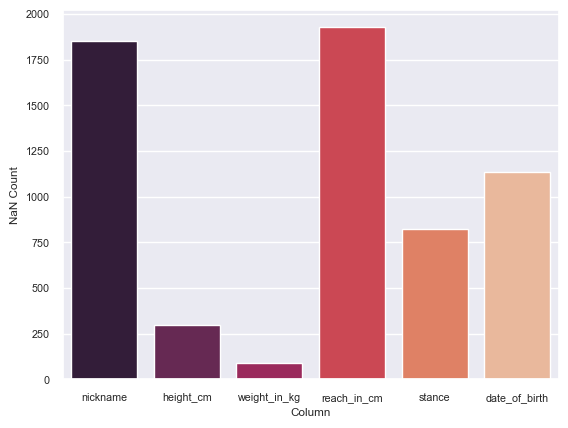

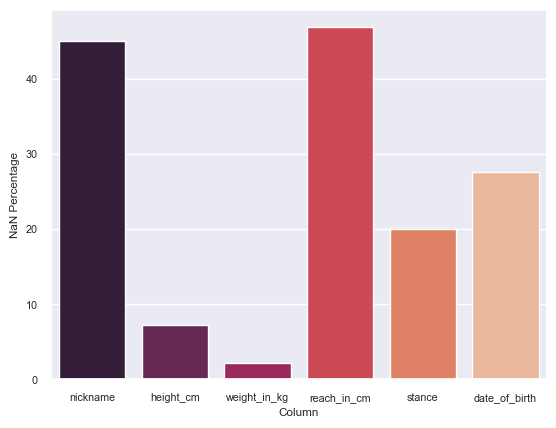

In [82]:
#1st bar plot for count of missing data, 2nd for percentage
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=0.70)
sns.barplot(data = filtered_nan_df ,x='Column', hue='Column', legend= False , y='NaN Count' , palette="rocket")
plt.show()
sns.barplot(data = filtered_nan_df ,x='Column', hue='Column', legend= False , y='NaN Percentage' , palette="rocket")
plt.show()

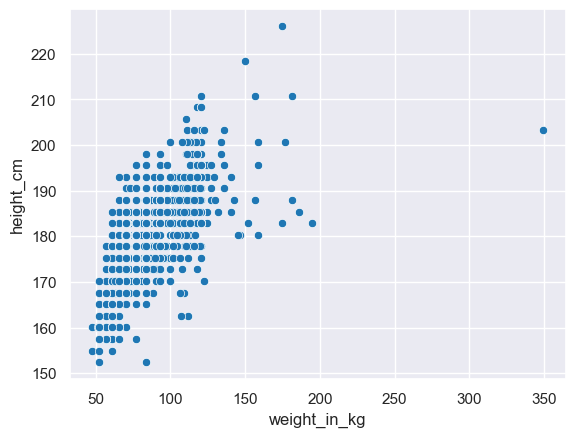

In [130]:
sns.set_context(font_scale=1)
sns.scatterplot(x='weight_in_kg', y='height_cm' , data=df)
plt.show()

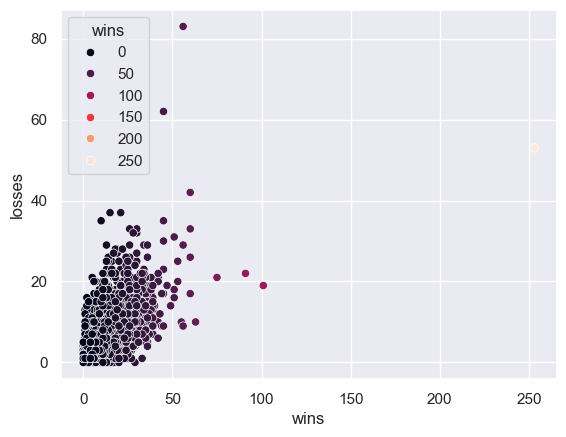

In [126]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1)
sns.scatterplot(data = df ,x='wins',hue='wins', y='losses' , palette="rocket")
plt.show()

In [116]:
#looking for a guy with most registered wins
df.sort_values('wins' , ascending = False).head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
3969,Travis Fulton,The Ironman,253,53,10,182.88,108.86,NaN,Orthodox,1977-05-29,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
2420,Dan Severn,The Beast,101,19,1,187.96,113.40,NaN,Southpaw,1958-06-08,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
675,Jeremy Horn,Gumby,91,22,5,185.42,83.91,187.96,Orthodox,1975-08-25,1.19,39.0,1.99,55.0,1.83,38.0,29.0,1.1
599,Travis Wiuff,The Diesel,75,21,0,190.50,92.99,NaN,Orthodox,1978-03-15,0.48,30.0,4.03,41.0,4.84,57.0,44.0,1.2
3740,Luis Santos,NaN,63,10,1,185.42,77.11,NaN,Southpaw,NaN,4.40,57.0,4.00,64.0,0.00,0.0,0.0,0.0


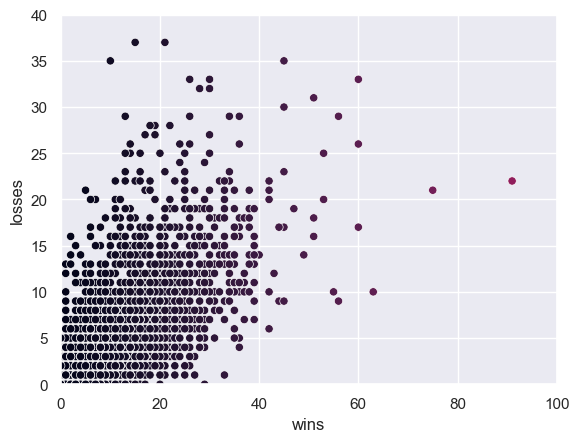

In [122]:
#there are only 2 figters with more then 100 wins and only 4 fighters with more then 40 losses
#on this scatter plot we will zoom in on more realistic data
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1)
sns.scatterplot(data = df ,x='wins',hue='wins', legend = False, y='losses' , palette="rocket")
plt.ylim(0,40)
plt.xlim(0,100)
plt.show()